In [1]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import math
import datetime as dt
from datetime import date,timedelta
from numpy import array

In [2]:
# Load the closing price file
file="predictions2000s.56d.15e.100ip.csv"
predictions_df=pd.read_csv(file)
predictions_df.head()

,Date,SecuritiesCode,Close
0,2021-12-06,1301,2992.687054
1,2021-12-06,1332,579.618975
2,2021-12-06,1333,2367.621644
3,2021-12-06,1376,1419.280200
4,2021-12-06,1377,3264.182692


In [3]:
# create a list of all the securities
one_date_df=predictions_df.loc[(predictions_df['Date']==predictions_df['Date'][0]),['SecuritiesCode']]
securities=one_date_df['SecuritiesCode'].tolist()

In [4]:
# getting close prices for all SecuritiesCodes
prices_target = predictions_df.pivot(index='Date', columns='SecuritiesCode', values='Close')
prices_target = prices_target.dropna()
prices_target.head()

SecuritiesCode,1301,1332,1333,1376,1377,1379,1381,1407,1414,1417,...,9982,9983,9984,9987,9989,9990,9991,9993,9994,9997
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-06,2992.687054,579.618975,2367.621644,1419.280200,3264.182692,1922.352161,3262.643459,5295.995129,5077.783241,1947.960042,...,1752.308325,70702.067757,6771.672182,3168.098474,3127.299701,571.094738,820.784492,1720.982253,2382.383211,702.030116
2021-12-07,2980.222656,576.933613,2357.939207,1411.282416,3251.264660,1918.572289,3260.844272,5253.695422,5074.373200,1938.751673,...,1749.397368,70132.033935,6683.844220,3165.543545,3108.083855,568.207305,818.730381,1717.966534,2376.382090,697.417271
2021-12-08,2969.970184,574.774925,2350.475694,1404.414156,3241.359165,1915.941430,3261.397777,5189.168161,5072.821195,1930.094008,...,1747.179181,69588.363129,6608.578176,3165.265120,3092.636060,565.540172,817.544313,1715.451331,2372.232862,693.499663
2021-12-09,2961.932126,573.068998,2344.953066,1398.905295,3234.495904,1914.363920,3264.314954,5104.726051,5073.271339,1921.909391,...,1745.754321,69088.580105,6550.910220,3166.965901,3081.155512,563.227454,817.224284,1713.600392,2369.709041,690.218561
2021-12-10,2955.841259,571.730837,2341.003534,1394.784215,3230.370972,1913.655008,3269.361198,5004.539302,5075.559325,1914.125307,...,1745.090605,68639.294583,6511.678794,3170.262341,3073.340414,561.331600,817.677052,1712.431391,2368.481307,687.473304


In [5]:
# first 20 values of SecuritiesCodes for every time step.
first_20 = []
for i in range(0,len(prices_target.index),1):
      first_20.append(-np.sort(-prices_target.iloc[i, :].values)[:20])
prices_target_first_20 = pd.DataFrame(first_20,index=prices_target.index)
prices_target_first_20.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Date,,,,,,,,,,,,,,,,,,,,
2021-12-06,71551.889733,70702.067757,68093.018444,58827.079497,50087.421035,41934.962439,39942.681808,34540.682610,31615.829105,28329.872109,24790.961251,22939.259959,22785.607508,22583.744117,20520.814243,19610.123660,19135.246170,19086.676116,19066.066728,18944.826435
2021-12-07,71325.185979,70132.033935,67878.522490,58826.859056,50108.222667,41636.742046,39972.581291,34569.773399,31434.792652,28234.659450,24589.706446,22925.602375,22654.747603,22368.684619,20494.570201,19394.200202,19062.278683,19026.924812,18825.008462,18809.890684
2021-12-08,70990.564344,69588.363129,67616.460635,58757.059913,50111.914874,41260.657539,40050.940161,34547.856126,31250.984110,28040.203449,24274.834746,22910.017482,22509.451070,22124.817984,20463.045209,19198.923099,19010.376306,18967.592633,18711.612689,18602.356102
2021-12-09,70563.964543,69088.580105,67311.686411,58630.396250,50098.906986,40809.616178,40178.497419,34475.923682,31061.997751,27754.659548,23861.424120,22892.916916,22340.286117,21856.373704,20427.868842,19026.291268,18984.091740,18911.168838,18604.764465,18439.953091
2021-12-10,70064.530478,68639.294583,66972.934252,58459.579141,50071.352790,40349.486113,40296.843064,34359.805497,30866.736062,27395.067394,23373.624626,22874.686899,22145.060225,21569.227489,20390.352629,18982.301304,18875.520707,18858.542024,18503.936814,18315.191783


In [6]:
# last 20 values of SecuritiesCodes for every time step.
last_20 = []
for i in range(0,len(prices_target.index),1):
      last_20.append(np.sort(prices_target.iloc[i, :].values)[0:20])
prices_target_last_20 = pd.DataFrame(last_20,index=prices_target.index)
prices_target_last_20.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Date,,,,,,,,,,,,,,,,,,,,
2021-12-06,38.879240,51.732458,69.204530,126.633130,130.664778,141.175978,151.733603,151.819693,153.168594,153.365114,166.113192,170.053934,171.533360,175.920329,183.351359,188.856258,193.143668,201.543529,205.828386,210.684346
2021-12-07,38.819498,51.480043,68.484828,125.903005,129.520606,140.482277,148.655849,148.959740,151.367287,153.066338,165.766358,168.480890,170.116213,175.878721,182.529054,188.067082,191.945665,201.172098,205.091171,208.971988
2021-12-08,38.769582,51.270668,67.878965,125.297692,128.566797,140.015253,142.829131,145.474878,151.047713,153.068535,165.526658,166.815956,168.898224,175.842078,181.936101,187.482264,191.387957,200.891850,204.279855,207.598533
2021-12-09,38.739564,51.109924,67.400039,124.805920,127.815919,135.619618,139.761275,141.384839,150.764241,153.319389,165.065513,165.389346,167.880689,175.799883,181.585397,187.146000,191.458072,200.701366,203.468623,206.550673
2021-12-10,38.732416,50.994892,67.044567,124.410611,127.171224,127.259280,136.767218,139.685301,150.507626,153.761475,163.231903,165.340827,167.045296,175.746897,181.459239,187.056210,192.049706,200.590829,202.692000,205.784359


In [7]:
weights = np.linspace(start=2, stop=1, num=20)
weights

array([2.        , 1.94736842, 1.89473684, 1.84210526, 1.78947368,
       1.73684211, 1.68421053, 1.63157895, 1.57894737, 1.52631579,
       1.47368421, 1.42105263, 1.36842105, 1.31578947, 1.26315789,
       1.21052632, 1.15789474, 1.10526316, 1.05263158, 1.        ])

In [8]:
Sup=((prices_target_first_20 * weights).sum(axis = 1))/np.mean(weights)
Sup

Date
2021-12-06    772918.117580
2021-12-07    769987.342786
2021-12-08    766503.912136
2021-12-09    762557.242298
2021-12-10    758269.750254
2021-12-13    753799.965664
2021-12-14    749237.735651
2021-12-15    744617.318850
2021-12-16    739989.317758
2021-12-17    735436.568167
2021-12-20    730957.921049
2021-12-21    726556.591543
2021-12-22    722253.207170
2021-12-23    718042.448617
2021-12-24    713940.314595
2021-12-27    710035.108247
2021-12-28    706410.341719
2021-12-29    702844.690196
2021-12-30    699356.561952
2022-01-04    695943.883727
2022-01-05    692682.967564
2022-01-06    689540.407544
2022-01-07    686469.044422
2022-01-11    683474.088944
2022-01-12    680722.113242
2022-01-13    678047.700588
2022-01-14    675447.795187
2022-01-17    672927.238187
2022-01-18    670470.486401
2022-01-19    668067.794578
2022-01-20    665719.054878
2022-01-21    663423.955732
2022-01-24    661181.952846
2022-01-25    658992.486158
2022-01-26    656859.674831
2022-01-27    6

In [9]:
Sdown=((prices_target_last_20 * weights).sum(axis = 1))/np.mean(weights)
Sdown

Date
2021-12-06    2858.482428
2021-12-07    2837.987383
2021-12-08    2817.745341
2021-12-09    2797.675050
2021-12-10    2777.586225
2021-12-13    2757.075420
2021-12-14    2736.537250
2021-12-15    2715.767959
2021-12-16    2694.845068
2021-12-17    2673.864609
2021-12-20    2652.692172
2021-12-21    2631.097118
2021-12-22    2608.969598
2021-12-23    2586.333702
2021-12-24    2557.024080
2021-12-27    2434.201297
2021-12-28    2297.445965
2021-12-29    2162.535405
2021-12-30    2037.330458
2022-01-04    1817.597764
2022-01-05    1575.996769
2022-01-06    1330.345781
2022-01-07    1090.045671
2022-01-11     864.486701
2022-01-12     649.189771
2022-01-13     441.436592
2022-01-14     240.575876
2022-01-17      46.486756
2022-01-18    -143.148791
2022-01-19    -329.186222
2022-01-20    -511.548686
2022-01-21    -690.545208
2022-01-24    -866.994801
2022-01-25   -1041.458325
2022-01-26   -1414.644154
2022-01-27   -1818.333920
2022-01-28   -2205.047052
2022-01-31   -2558.481208
2022-02

In [10]:
(Sup - Sdown)

Date
2021-12-06    770059.635153
2021-12-07    767149.355402
2021-12-08    763686.166795
2021-12-09    759759.567248
2021-12-10    755492.164029
2021-12-13    751042.890244
2021-12-14    746501.198401
2021-12-15    741901.550891
2021-12-16    737294.472690
2021-12-17    732762.703558
2021-12-20    728305.228878
2021-12-21    723925.494425
2021-12-22    719644.237572
2021-12-23    715456.114915
2021-12-24    711383.290516
2021-12-27    707600.906950
2021-12-28    704112.895754
2021-12-29    700682.154792
2021-12-30    697319.231494
2022-01-04    694126.285964
2022-01-05    691106.970795
2022-01-06    688210.061763
2022-01-07    685378.998751
2022-01-11    682609.602242
2022-01-12    680072.923471
2022-01-13    677606.263996
2022-01-14    675207.219311
2022-01-17    672880.751431
2022-01-18    670613.635192
2022-01-19    668396.980799
2022-01-20    666230.603564
2022-01-21    664114.500941
2022-01-24    662048.947647
2022-01-25    660033.944483
2022-01-26    658274.318985
2022-01-27    6

In [11]:
daily_spread_return = (Sup - Sdown).mean()/(Sup - Sdown).std()
daily_spread_return

16.250601880797948

In [13]:
count_SecuritiesCode_first_20 = prices_target.isin(prices_target_first_20.values.flatten())
True_first_20 = (count_SecuritiesCode_first_20.apply(pd.Series.value_counts, axis=0).fillna(0).iloc[1:2]).T
True_first_20 = True_first_20.add_prefix('first_20_')

In [14]:
count_SecuritiesCode_last_20 = prices_target.isin(prices_target_last_20.values.flatten())
True_last_20 = (count_SecuritiesCode_last_20.apply(pd.Series.value_counts, axis=0).fillna(0).iloc[1:2]).T
True_last_20 = True_last_20.add_prefix('last_20_')

In [15]:
Count = pd.concat([True_first_20,True_last_20],axis=1)
Count

,first_20_True,last_20_True
SecuritiesCode,,
1301,0.0,0.0
1332,0.0,0.0
1333,0.0,0.0
1376,0.0,0.0
1377,0.0,0.0
...,...,...
9990,0.0,0.0
9991,0.0,0.0
9993,0.0,0.0


In [16]:
SecuritiesCode_weight = (Count/len(prices_target.index)).sum(axis=1)/2

In [17]:
df_weight = pd.DataFrame(SecuritiesCode_weight,columns=["Weight"]).reset_index()

In [18]:
df_weight

,SecuritiesCode,Weight
0,1301,0.0
1,1332,0.0
2,1333,0.0
3,1376,0.0
4,1377,0.0
...,...,...
1860,9990,0.0
1861,9991,0.0
1862,9993,0.0
1863,9994,0.0


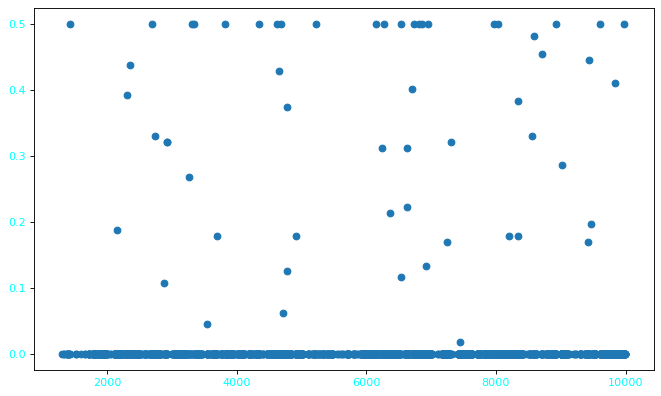

In [19]:
plt.figure(figsize=(10, 6), dpi=80)
plt.xticks(color='cyan')
plt.yticks(color='cyan')
plt.scatter(x=SecuritiesCode_weight.index,y=SecuritiesCode_weight)

In [20]:
Count.reset_index
Count.columns
top_ranked = Count.sort_values(by=['first_20_True'],ascending=False).iloc[0:20]

In [21]:
top_ranked = top_ranked.drop(columns='last_20_True',axis=1)
top_ranked

,first_20_True
SecuritiesCode,
6806,56.0
9983,56.0
6146,56.0
9605,56.0
3349,56.0
6954,56.0
8035,56.0
4684,56.0
6861,56.0


In [22]:
top_ranked.to_csv('stacked_lstm_top_ranked.csv')

In [25]:
for i in range(20):
     print(top_ranked.index[i])

6806
9983
6146
9605
3349
6954
8035
4684
6861
6273
5217
7974
4628
6532
9435
4661
9843
6702
7309
9022
